In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.datasets import load_gunpoint
import pandas as pd
import array
import numpy as np
from datetime import timedelta

In [3]:
price_data = pd.read_csv("Data/Stocks/aapl.us.txt")
price_data.head(3)
price_data.Date = pd.to_datetime(price_data.Date)

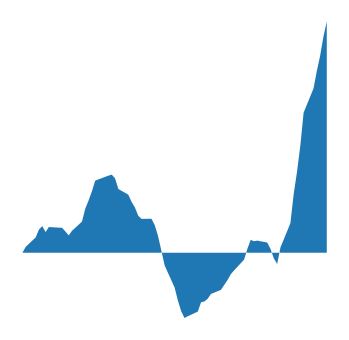

In [4]:
temp = price_data[price_data.Date > price_data.Date.max() - timedelta(days=100)]

temp = temp.sort_values(by="Date", ascending=True)
# Smoothen the prices by taking the average of the past 6 days (including the day itself)
# This way, daily random walks of the market are smoothened out more
temp.Close = (temp.Close + temp.Close.shift(1) + temp.Close.shift(2) + temp.Close.shift(3) + temp.Close.shift(4) + temp.Close.shift(5)) / 6
temp.dropna(inplace=True)
temp.reset_index(drop=True, inplace=True)

temp.Close = np.log10(temp.Close)
temp.Close = temp.Close - temp.Close.iloc[0]

fig = plt.figure(figsize=(6, 6))

plt.fill_between(temp.Date, temp.Close)

plt.axis("off") # turn the axes off

plt.show()

In [37]:
data = price_data.Close.dropna().array.reshape(1, -1)

# get the Gramian Angular Field
gaf = GramianAngularField()
x_gaf = gaf.fit_transform(data)
fig = plt.figure(figsize=(5, 5))
plt.imshow(x_gaf[0], cmap='rainbow', origin='lower', vmin=-1., vmax=1.)
plt.axis("off") # turn the axes off

plt.show()

# plt.savefig(img_path)

plt.close(fig) # avoid displaying image
plt.close("all")
fig.clf() # remove from memory
plt.clf() # clear memory

KeyboardInterrupt: 